In [1]:
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

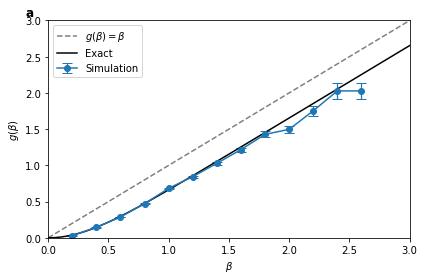

In [2]:
N=3
beta_list=[0.2,0.4,0.6,0.8,1.0,1.2,1.4,1.6,1.8,2.0,2.2,2.4,2.6,2.8,3.0]

shots=10000


n_beta=len(beta_list)
d= N**2
beta_max= max(beta_list)


with open("../running_coupling/data/g_function_{0}Q_{1}beta_{2}shots".format(N,n_beta,shots)+".txt", "r") as f:

    data = f.readlines()
    

gbeta_list = data[0].split()
gbeta_error_list = data[1].split()

aux_list = []
for string in gbeta_list:
    aux_list.append(float(string))
gbeta_list=aux_list

aux_list = []
for string in gbeta_error_list:
    aux_list.append(float(string))
gbeta_error_list=aux_list

    
    

alpha_beta=['a','b','c','d','e','f']

fig,ax = plt.subplots(figsize = (6,4),tight_layout=True)

ax.errorbar(beta_list,gbeta_list,yerr = gbeta_error_list,fmt='-o',label="Simulation",\
            elinewidth = 1.2,capsize = 5)

ax.set_xlim(0,max(beta_list))
ax.set_ylim(0,max(beta_list))
ax.set_xlabel(r"$\beta$")
ax.set_ylabel(r"$g(\beta)$")

x=np.linspace(0,3,100)
ax.plot(x, x,'--b',label=r"$ g(\beta)=\beta $",color="grey")
ax.plot(x,0.5*np.log(np.cosh(2*x)),'-',label=r"Exact",color="black")


ax.legend(loc="best")

plt.text(-0.04,1+0.005,alpha_beta[0],horizontalalignment='right', verticalalignment='bottom',fontsize = 'large',fontweight='bold',transform = ax.transAxes)

plt.savefig("./pictures/g_function_{0}Q_{1}layer_{2}shots".format(N,n_beta,shots)+".pdf")

plt.show()

这里$\beta$变大时error bar 变大主要是因为 $\tanh^{-1}$函数决定的，注意到$\tanh^{-1}$函数的形状很像 tan 函数， 而

$g(\beta)=\tanh^{-1}(\langle Z_0\rangle )$

当$\beta$变大时，$\langle Z_0\rangle $接近-1，这时-1附近的微小扰动将使$g(\beta)$ 有很大涨落，

## 需要指数多的measurement次数来缓解这种统计误差

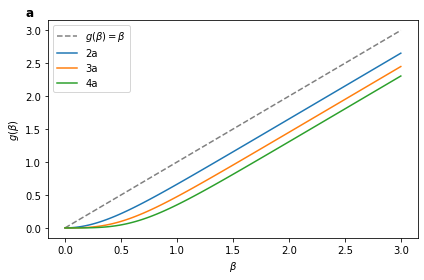

In [9]:
fig,ax = plt.subplots(figsize = (6,4),tight_layout=True)

#ax.errorbar(beta_list,gbeta_list,yerr = gbeta_error_list,fmt='-o',label="Simulation",\
            #elinewidth = 1.2,capsize = 5)

#ax.set_xlim(0,max(beta_list))
#ax.set_ylim(0,max(beta_list))
ax.set_xlabel(r"$\beta$")
ax.set_ylabel(r"$g(\beta)$")

x=np.linspace(0,3,100)
ax.plot(x, x,'--b',label=r"$ g(\beta)=\beta $",color="grey")
ax.plot(x,0.5*np.log(np.cosh(2*x)),'-',label=r"2a")
ax.plot(x,0.5*np.log((np.exp(3*x)+3*np.exp(-x))/(np.exp(-3*x)+3*np.exp(x))),'-',label=r"3a")
ax.plot(x,0.5*np.log((np.exp(4*x)+np.exp(-4*x)+6)/(4*np.exp(2*x)+4*np.exp(-2*x))),'-',label=r"4a")


ax.legend(loc="best")

plt.text(-0.04,1+0.005,alpha_beta[0],horizontalalignment='right', verticalalignment='bottom',fontsize = 'large',fontweight='bold',transform = ax.transAxes)

#plt.savefig("./pictures/g_function_{0}Q_{1}layer_{2}shots".format(N,n_beta,shots)+".pdf")

plt.show()

In [21]:
beta=10
beta-np.log2(3)/2*np.log(2)

x=beta
0.5*np.log((np.exp(3*x)+3*np.exp(-x))/(np.exp(-3*x)+3*np.exp(x)))

9.450693855665945

In [22]:
beta-np.log2(3)/2*np.log(2)

9.450693855665945